# Análisis exploratorio de feature selection
*   Completitud de variables,
*   Varianza de variables
*   Determinar qué variables vale la pena eliminar/mantener


TODOs: Hoy
* Analisis exploratorios de datos (Distribucion por tipo de datos, Varianza de datos numericos,
* Modificar funciones ya escritas para que de el output de una matriz de votos
* Funcion de normalizacion
* Crear Information Value function
* correlacion no lineal


In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "/content/drive/My Drive/dreamAD"

final_merged_data.csv


In [84]:
#Read file
file_path = '/content/drive/My Drive/dreamAD/final_merged_data.csv'
data = pd.read_csv(file_path)

In [85]:
data.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


1. # Completeness analysis

In [6]:
#Check missing values
missing_count = data.isna().sum()
print(len(missing_count[missing_count > 0]))

0


In [62]:
def completeness_filter(df: pd.DataFrame, min_completeness_pct: float = 40.0):

    #Numeric and non-numeric columnsvariation_of_information_score
    numerics = df.select_dtypes(include=np.number).columns.tolist()
    no_numerics = df.select_dtypes(exclude=np.number).columns.tolist()
    #Completeness analysis
    completeness = df[numerics].apply(lambda col: (col != 0).sum() / len(col) * 100)

    #Create the completeness percent table
    pct_completeness = completeness.reset_index()
    pct_completeness.columns = ['Variable', 'completeness_Pct']
    pct_completeness = pct_completeness.sort_values(by='completeness_Pct', ascending=True)

    #Vars that passed the filter
    numeric_filtered = completeness[completeness >= min_completeness_pct].index.tolist()
    #Combine non-numeric columns (which are always saved) with numeric columns that passed
    final_cols = no_numerics + numeric_filtered

    #Final filter
    df_filtered = df[final_cols]

    return df_filtered, numeric_filtered, pct_completeness

In [8]:
completeness_filtered, completeness_vars, completeness_pct = completeness_filter(data, 80.0)

In [9]:
completeness_filtered.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.161838,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,-0.028712,0.389035,0.942567,0.143539,0.145281,0.357426,0.686444
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.023236,0.120584,-0.197487,0.025780,-0.082098,-0.086830,-0.035383,0.232218
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.021958,0.206852,-0.197567,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


In [10]:
len(completeness_vars)

6446

In [11]:
completeness_pct.head(10)

,Variable,completeness_Pct
222,clustering_global_L4-IT_MTG,0.0
706,largest_community_size_Pax6_A9,0.0
240,clustering_local_mean_L5-6-NP_A9,0.0
241,clustering_global_L5-6-NP_A9,0.0
688,n_nodes_Pax6_A9,0.0
689,n_edges_Pax6_A9,0.0
716,clustering_global_Pax6_MTG,0.0
722,Q_modularity_Pax6_MTG,0.0
221,clustering_local_mean_L4-IT_MTG,0.0
705,n_communities_Pax6_A9,0.0


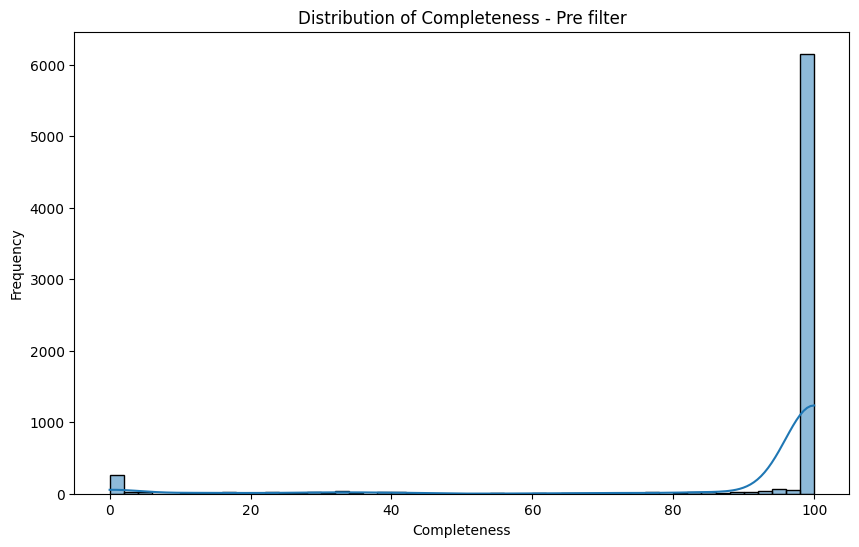

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Pre filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

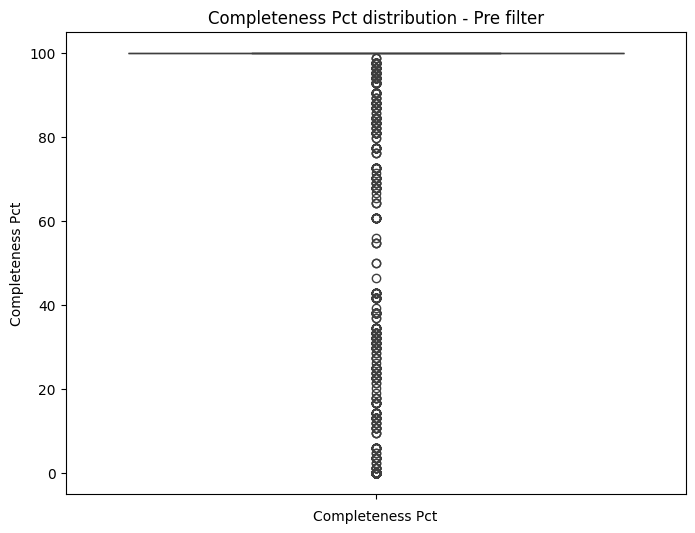

In [13]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Pre filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

In [14]:
_, _, post_completeness_pct = completeness_filter(completeness_filtered)

In [15]:
post_completeness_pct.head(10)

,Variable,completeness_Pct
179,n_components_Lamp5_MTG,80.952381
178,frac_giant_component_Lamp5_MTG,80.952381
6,CERAD,80.952381
180,deg_mean_Lamp5_MTG,80.952381
184,largest_community_size_Lamp5_MTG,80.952381
181,deg_median_Lamp5_MTG,80.952381
182,kcore_max_Lamp5_MTG,80.952381
183,n_communities_Lamp5_MTG,80.952381
175,diameter_Lamp5_MTG,80.952381
174,avg_path_len_Lamp5_MTG,80.952381


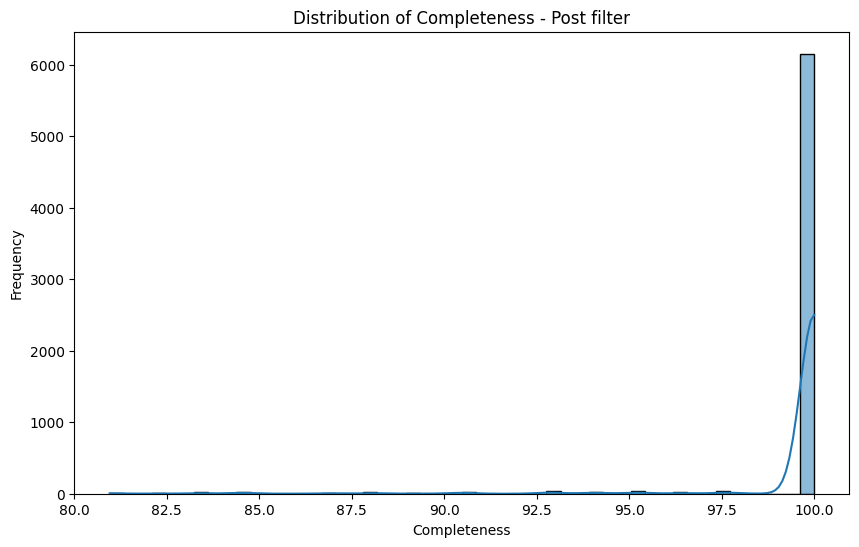

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(post_completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Post filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

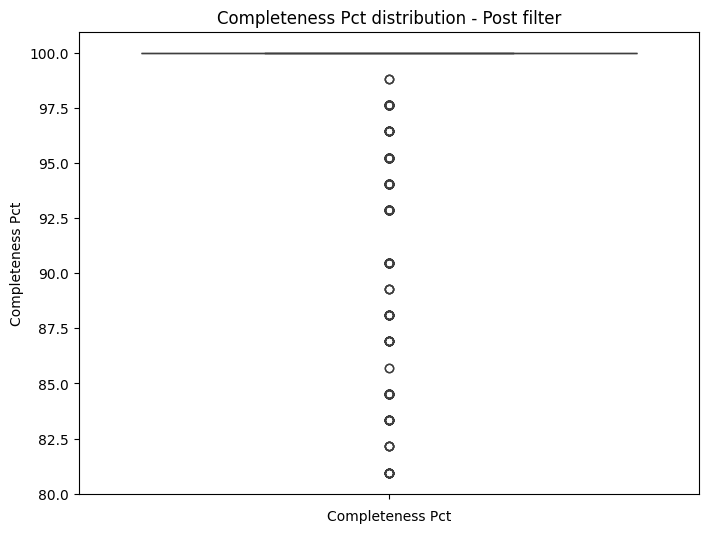

In [17]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=post_completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Post filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

## The variants here selected are in:

In [67]:
completeness_vars

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Thal',
 'Braak',
 'CERAD',
 'ADNC',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'Race_1',
 'Race_2',
 'Race_3',
 'Race_5',
 'Race_7',
 'Race_8',
 'Race_9',
 'Race_11',
 'n_nodes_Astrocyte_A9',
 'n_edges_Astrocyte_A9',
 'avg_path_len_Astrocyte_A9',
 'diameter_Astrocyte_A9',
 'global_density_Astrocyte_A9',
 'size_giant_component_Astrocyte_A9',
 'frac_giant_component_Astrocyte_A9',
 'n_components_Astrocyte_A9',
 'assortativity_Astrocyte_A9',
 'deg_mean_Astrocyte_A9',
 'deg_median_Astrocyte_A9',
 'deg_sd_Astrocyte_A9',
 'kcore_max_Astrocyte_A9',
 'Q_modularity_Astrocyte_A9',
 'perc_targeted_50_Astrocyte_A9',
 'n_communities_Astrocyte_A9',
 'largest_community_size_Astrocyte_A9',
 'n_nodes_L2-3-IT_A9',
 'n_edges_L2-3-IT_A9',
 'avg_path_len_L2-3-IT_A9',
 'diameter_L2-3-IT_A9',
 'global_density_L2-3-IT_A9',
 'size_giant_component_L2-3-IT_A9',
 'fra

# 2. Variance

In [18]:
def varianced(df, quartile=4, return_variance_table=False):
    """
    Filtra columnas de un DataFrame según su varianza y, opcionalmente,
    devuelve la tabla de varianzas.

    Args:
    -----------
    df (pd.DataFrame): DataFrame de entrada.
    quartile (int): Cuartil a conservar (1, 2, 3, o 4).
    keep_non_numeric (bool): Si es True, conserva las columnas no numéricas.
    return_variance_table (bool): Si es True, devuelve también la tabla de varianzas.

    Returns:
    --------
    pd.DataFrame or tuple:
        - Si return_variance_table es False (default), devuelve solo el DataFrame filtrado.
        - Si es True, devuelve una tupla: (DataFrame_filtrado, DataFrame_de_varianzas).
    """
    if isinstance(df, dict):
        df = pd.DataFrame(df)

    #Calculate the variance of all numeric columns.
    numeric_cols = df.select_dtypes(include=["number"])
    variance_table = numeric_cols.var().to_frame("Variance").sort_values("Variance", ascending=False)

    #Calculate the quartile limits
    quantiles = np.quantile(variance_table["Variance"], [0, 0.25, 0.5, 0.75, 1.0])
    bounds = {
        1: (quantiles[0], quantiles[1]),
        2: (quantiles[1], quantiles[2]),
        3: (quantiles[2], quantiles[3]),
        4: (quantiles[3], quantiles[4])
    }

    #Select vars within the quartile specified
    low, high = bounds[quartile]
    variance_vars = variance_table[
        (variance_table["Variance"] >= low) & (variance_table["Variance"] <= high)
    ].index.tolist()

    #Filter data
    non_numeric_cols = df.select_dtypes(exclude=["number"]).columns.tolist()
    variance_vars = non_numeric_cols + variance_vars
    filtered_df = df[variance_vars]

    #If you need the variance table
    if return_variance_table:
        return filtered_df, variance_table, variance_vars
    else:
        return filtered_df, variance_vars

In [19]:
variance_filter, variance_data, variance_vars = varianced(data, quartile=3, return_variance_table=True)

In [20]:
variance_filter.head(10)

,Donor ID,4_Sst_A9,32_L6-CT_A9,46_Oligodendrocyte_A9,107_L2-3-IT_A9,120_L5-IT_MTG,21_L6-IT_MTG,102_L4-IT_MTG,91_Oligodendrocyte_MTG,27_L5-IT_MTG,...,77_L5-ET_A9,77_Endothelial_A9,77_Pax6_MTG,77_Sst-Chodl_MTG,77_Sst-Chodl_A9,77_Pax6_A9,77_VLMC_A9,37_L6b_MTG,perc_targeted_50_Pvalb_A9,10_L6-IT-Car3_MTG
0,H20-33-034,-0.214357,0.154588,-0.376145,-0.568315,-0.320554,0.488431,0.027838,-0.161690,0.082198,...,-0.331716,-0.303661,-0.305186,-0.303661,-0.290001,-0.311495,-0.290001,0.094291,0.20,-0.134066
1,H21-33-035,-0.674085,0.249331,-0.675951,-0.583855,0.197997,-0.192516,0.448993,-0.541555,-0.495461,...,-0.252510,-0.252510,-0.252510,-0.306103,-0.252510,-0.252510,-0.252510,0.011959,0.20,-0.001594
2,H20-33-014,-0.870037,0.146164,-0.253442,-0.420892,0.075997,0.579823,0.251080,-0.044463,-0.502546,...,-0.287868,-0.290001,-0.304482,-0.304482,-0.433972,-0.304817,-0.363144,0.090475,0.28,-0.022146
3,H21-33-015,-0.629151,0.280975,-0.672948,-0.614739,0.179967,-0.163466,0.448450,-0.528808,-0.472534,...,-0.075811,-0.075811,-0.075811,-0.174731,-0.597141,-0.357664,-0.059521,0.024518,0.24,0.007216
4,H20-33-033,-0.193419,0.029182,-0.313316,0.199206,0.207330,-0.079737,0.532894,-0.538446,-0.483711,...,-0.326319,-0.304817,-0.300643,-0.062847,-0.326678,-0.298900,-0.326678,0.096941,0.20,-0.053516
5,H21-33-043,-0.639367,0.274661,-0.681372,-0.611235,0.170006,-0.166037,0.452691,-0.526649,-0.472035,...,-0.440735,-0.211197,-0.440735,-0.059521,-0.453564,-0.228967,-0.440735,0.040542,0.20,0.009258
6,H21-33-005,-0.639695,0.274415,-0.675577,-0.487877,0.210892,-0.168694,0.455290,-0.550881,-0.513369,...,-0.429304,-0.302819,-0.429304,-0.444702,-0.228967,-0.304646,-0.429304,0.029613,0.30,0.017456
7,H20-33-031,-0.401496,-0.369065,-0.396656,-0.225246,-0.223911,-0.075634,0.396807,-0.329216,0.258790,...,-0.433972,-0.326678,-0.397556,-0.290001,-0.359042,-0.359042,-0.287868,0.111251,0.20,0.007206
8,H21-33-036,-0.627862,0.275338,-0.673015,-0.524661,0.199607,-0.163220,0.453597,-0.548591,-0.500641,...,-0.166089,-0.166089,-0.166089,-0.087922,-0.059521,-0.043626,-0.444702,0.025004,0.20,-0.002197
9,H21-33-002,-0.645870,0.272416,-0.689786,-0.583527,0.156267,-0.163576,0.453461,-0.516933,-0.459802,...,-0.453564,-0.453564,-0.453564,-0.100471,-0.444702,-0.440735,-0.211197,0.026867,0.40,0.013210


In [21]:
variance_data.head(10)

,Variance
n_edges_L5-IT_MTG,6.895924e+09
n_edges_L2-3-IT_A9,6.305776e+09
n_edges_L2-3-IT_MTG,5.859007e+09
n_edges_L5-IT_A9,5.731587e+09
n_edges_Pvalb_MTG,3.492076e+09
n_edges_L4-IT_A9,3.342557e+09
n_edges_Pvalb_A9,3.254402e+09
n_edges_Vip_MTG,2.881807e+09
n_edges_L6-IT_A9,2.722178e+09
n_edges_L4-IT_MTG,2.707036e+09


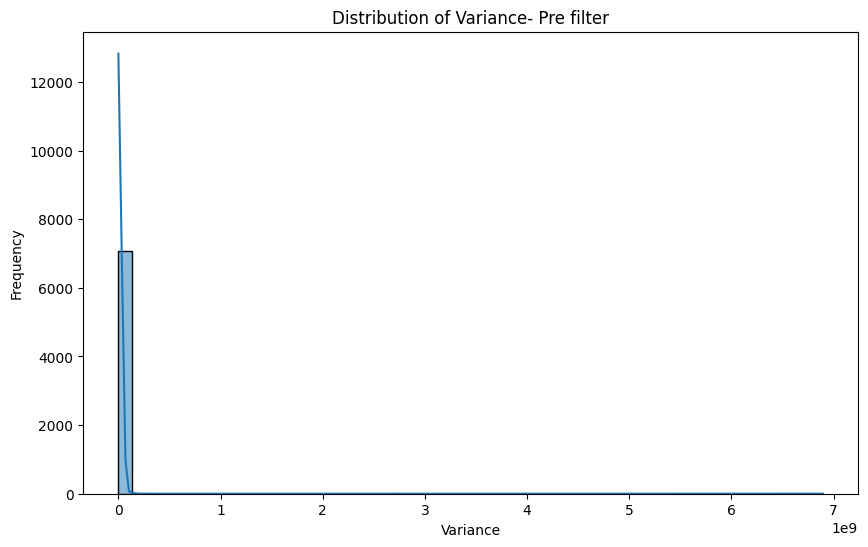

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(variance_data['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Pre filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

In [23]:
len(variance_vars)

1775

In [63]:
_,variance_data_post,_ = varianced(variance_filter, quartile=1, return_variance_table=True)

In [64]:
variance_data_post

,Variance
4_Sst_A9,0.042098
32_L6-CT_A9,0.042057
46_Oligodendrocyte_A9,0.042055
107_L2-3-IT_A9,0.042055
120_L5-IT_MTG,0.042045
...,...
77_Pax6_A9,0.010338
77_VLMC_A9,0.010338
37_L6b_MTG,0.010335
perc_targeted_50_Pvalb_A9,0.010334


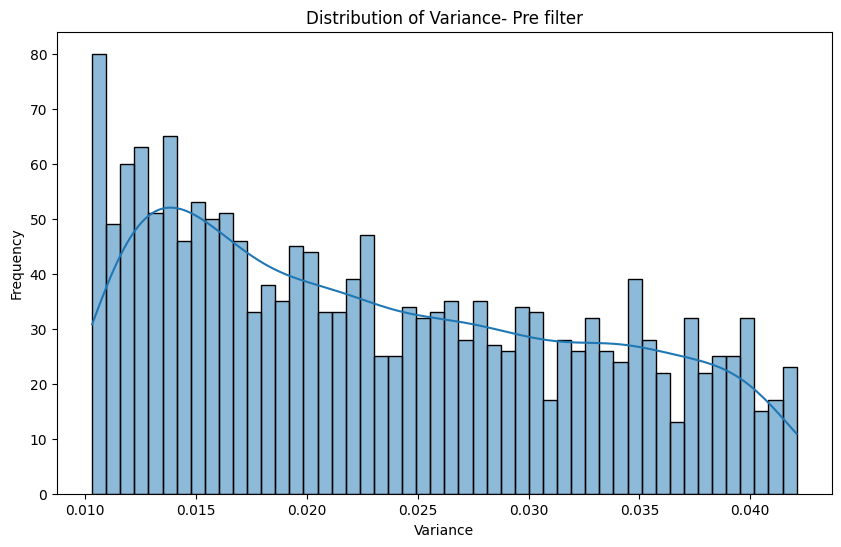

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(variance_data_post['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Pre filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

## The variants here selected are in


In [66]:
variance_vars

['Donor ID',
 '4_Sst_A9',
 '32_L6-CT_A9',
 '46_Oligodendrocyte_A9',
 '107_L2-3-IT_A9',
 '120_L5-IT_MTG',
 '21_L6-IT_MTG',
 '102_L4-IT_MTG',
 '91_Oligodendrocyte_MTG',
 '27_L5-IT_MTG',
 '48_Pvalb_A9',
 '76_Pvalb_MTG',
 '39_L2-3-IT_MTG',
 '127_Pvalb_MTG',
 '125_L5-IT_A9',
 '57_Lamp5_MTG',
 '11_L6-IT_A9',
 '16_Astrocyte_A9',
 'assortativity_L6-IT_MTG',
 '110_Pvalb_A9',
 '20_L6-CT_A9',
 '1_Lamp5_MTG',
 '123_Vip_A9',
 '121_Oligodendrocyte_MTG',
 '29_L2-3-IT_MTG',
 '45_Oligodendrocyte_MTG',
 '42_L2-3-IT_MTG',
 '108_L6-IT-Car3_MTG',
 '116_L4-IT_MTG',
 '23_Oligodendrocyte_A9',
 '121_Sst_MTG',
 '32_Sst_MTG',
 '64_Vip_A9',
 '44_Astrocyte_MTG',
 '71_L6b_A9',
 '2_Microglia-PVM_A9',
 '99_Astrocyte_A9',
 '66_L6-IT_MTG',
 '53_Vip_A9',
 'Q_modularity_Vip_A9',
 '41_Sst_MTG',
 '31_Sst_MTG',
 '55_Oligodendrocyte_MTG',
 '84_Lamp5_A9',
 '100_L5-IT_A9',
 '51_Pvalb_MTG',
 'global_density_Chandelier_A9',
 '77_L2-3-IT_A9',
 '109_Lamp5_A9',
 '12_L5-IT_MTG',
 '6_L2-3-IT_MTG',
 '8_Sst_A9',
 '42_Pvalb_MTG',
 '79_S

### 3. Outliers (Flooring and caping)

In [27]:
data_simple = data.columns[:100].tolist()
data_simple = data[data_simple]
data_simple.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,clustering_global_Chandelier_A9,assortativity_Chandelier_A9,deg_mean_Chandelier_A9,deg_median_Chandelier_A9,deg_sd_Chandelier_A9,kcore_max_Chandelier_A9,Q_modularity_Chandelier_A9,perc_targeted_50_Chandelier_A9,n_communities_Chandelier_A9,largest_community_size_Chandelier_A9
0,H20-33-034,85.0,16.0,10.016667,0.0,3.0,4.0,0.0,2.0,0.233687,...,0.0,-0.5,1.500000,1.5,0.57735,1.0,0.0,0.50,1.0,4.0
1,H21-33-035,97.0,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.0,-1.0,1.333333,1.0,0.57735,1.0,0.0,0.34,1.0,3.0
2,H20-33-014,82.0,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
3,H21-33-015,98.0,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
4,H20-33-033,68.0,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
5,H21-33-043,95.0,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
6,H21-33-005,95.0,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
7,H20-33-031,87.0,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
8,H21-33-036,93.0,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0
9,H21-33-002,70.0,18.0,3.200000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00,0.0,0.0


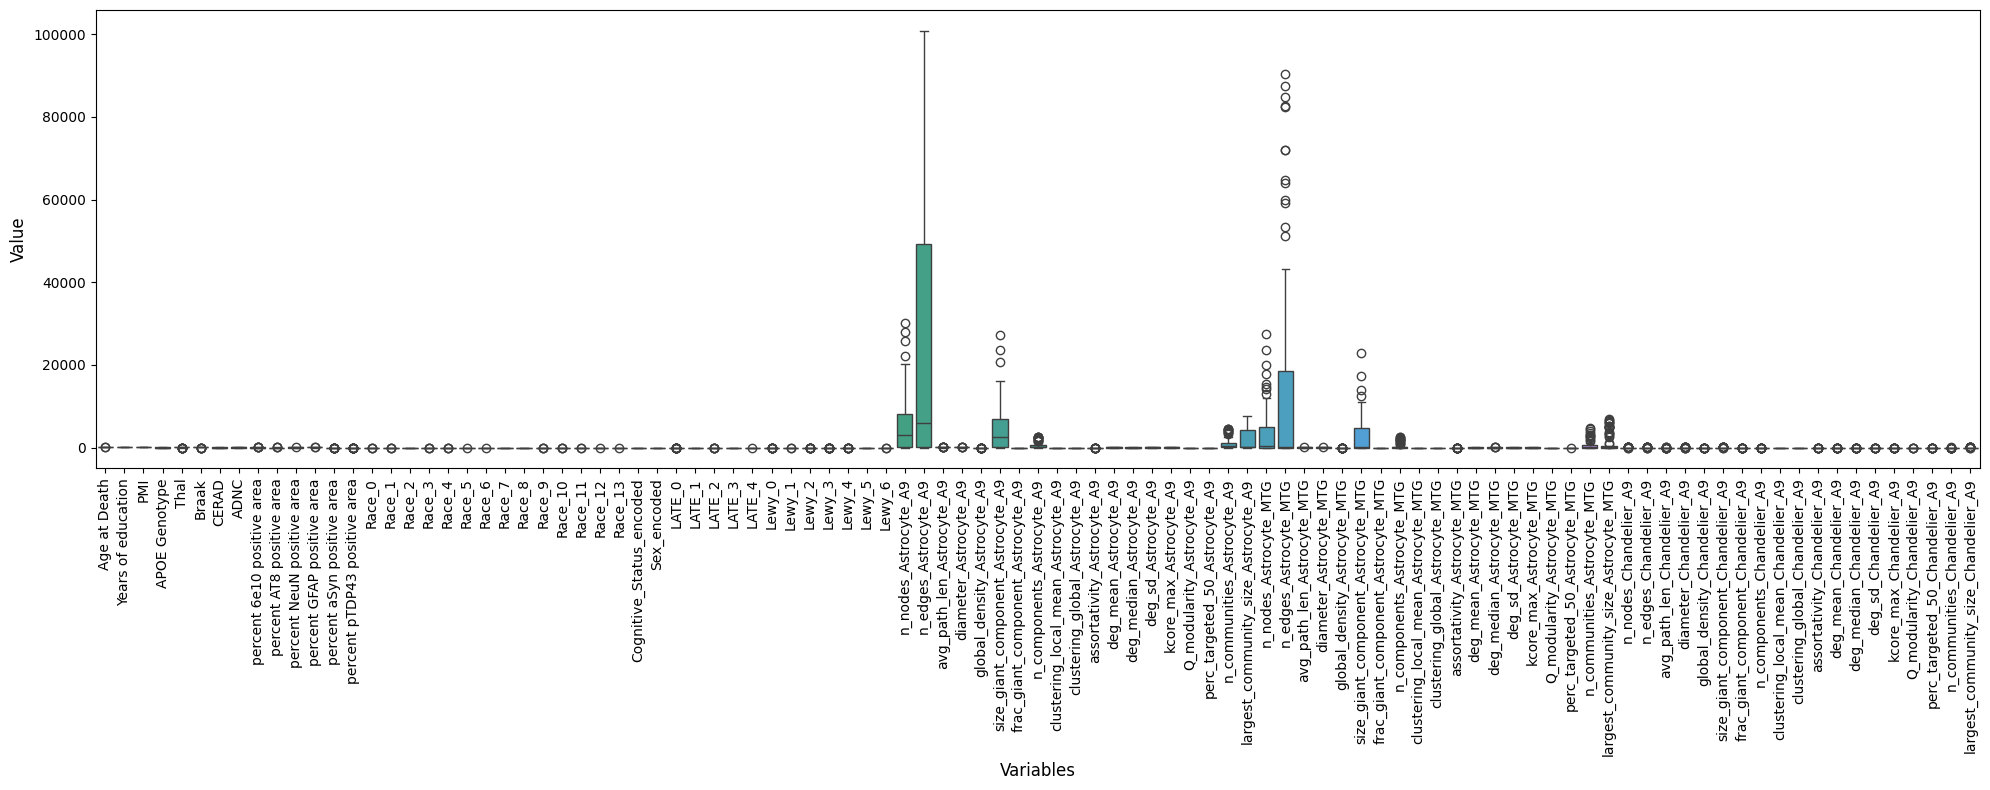

In [28]:
#Vars boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(data=data_simple)
#plt.title('Boxplots of 100 Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [29]:
def flooring_capping(df: pd.DataFrame,
                                 lower_quantile: float = 0.05,
                                 upper_quantile: float = 0.95) -> pd.DataFrame:
    """
    Applies flooring and capping to all numeric columns in a DataFrame using the quantiles method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        lower_quantile (float): The lower quantile to define the floor.
        upper_quantile (float): The upper quantile to define the ceiling.

    Returns:
        pd.DataFrame: A new DataFrame with the outliers handled.
    """

    #Select only the numeric columns and create a copy to avoid SettingWithCopyWarning
    numeric_cols = df.select_dtypes(include=np.number).columns
    df_copy = df.copy()

    for col in numeric_cols:
        #Calculate the lower and upper limits using the specified quantiles.
        lower_limit = df_copy[col].quantile(lower_quantile)
        upper_limit = df_copy[col].quantile(upper_quantile)

        #Apply flooring y capping
        df_copy[col] = df_copy[col].clip(lower=lower_limit, upper=upper_limit)

    return df_copy

In [30]:
floo_filter = flooring_capping(df=data, lower_quantile = 0.05,
                                 upper_quantile = 0.95)

In [31]:
floo_filter.head(10)

,Donor ID,Age at Death,Years of education,PMI,APOE Genotype,Thal,Braak,CERAD,ADNC,percent 6e10 positive area,...,118_Lamp5_MTG,119_Lamp5_MTG,120_Lamp5_MTG,121_Lamp5_MTG,122_Lamp5_MTG,123_Lamp5_MTG,124_Lamp5_MTG,125_Lamp5_MTG,126_Lamp5_MTG,127_Lamp5_MTG
0,H20-33-034,85.00,16.0,10.016667,1.0,3.0,4.0,0.0,2.0,0.233687,...,0.029689,0.094842,0.175546,0.251762,-0.044723,0.158981,-0.273649,-0.057044,0.029562,0.113846
1,H21-33-035,97.00,14.0,4.800000,2.0,5.0,5.0,2.0,3.0,1.736207,...,0.135361,-0.091992,0.135516,0.463252,-0.100847,0.288095,-0.322100,-0.077640,0.231139,0.271844
2,H20-33-014,82.00,16.0,7.400000,2.0,3.0,4.0,1.0,2.0,1.383656,...,0.052373,-0.307499,0.123839,0.036251,0.384980,0.674943,-0.062684,0.145281,0.357426,0.486620
3,H21-33-015,98.00,12.0,4.100000,2.0,2.0,4.0,1.0,1.0,0.242039,...,0.147891,-0.111411,0.149741,0.488438,-0.077304,0.364934,-0.335978,-0.048721,0.266424,0.314548
4,H20-33-033,72.45,18.0,6.500000,2.0,5.0,6.0,3.0,3.0,6.495167,...,0.115420,0.052125,0.033192,0.120584,-0.189214,0.031712,-0.082098,-0.086830,-0.004337,0.232218
5,H21-33-043,95.00,16.0,4.400000,2.0,4.0,2.0,1.0,1.0,1.577091,...,0.131109,-0.087222,0.149478,0.483910,-0.071543,0.339153,-0.343329,-0.076139,0.253402,0.288106
6,H21-33-005,95.00,16.0,10.200000,2.0,3.0,5.0,2.0,2.0,0.789628,...,0.126316,-0.086869,0.148722,0.488263,-0.078691,0.335643,-0.344008,-0.080572,0.255666,0.278963
7,H20-33-031,87.00,12.0,7.916667,2.0,4.0,6.0,3.0,3.0,3.162985,...,0.139332,-0.005457,0.033192,0.206852,-0.189214,0.065326,-0.127766,-0.084739,0.019891,0.244224
8,H21-33-036,93.00,14.0,4.000000,2.0,4.0,5.0,3.0,3.0,3.048090,...,0.148080,-0.104474,0.143842,0.486909,-0.088581,0.340838,-0.332394,-0.060739,0.251850,0.295774
9,H21-33-002,72.45,18.0,3.660000,4.0,5.0,6.0,3.0,3.0,3.362637,...,0.129549,-0.085039,0.148577,0.480048,-0.076079,0.340855,-0.342209,-0.075710,0.249211,0.287204


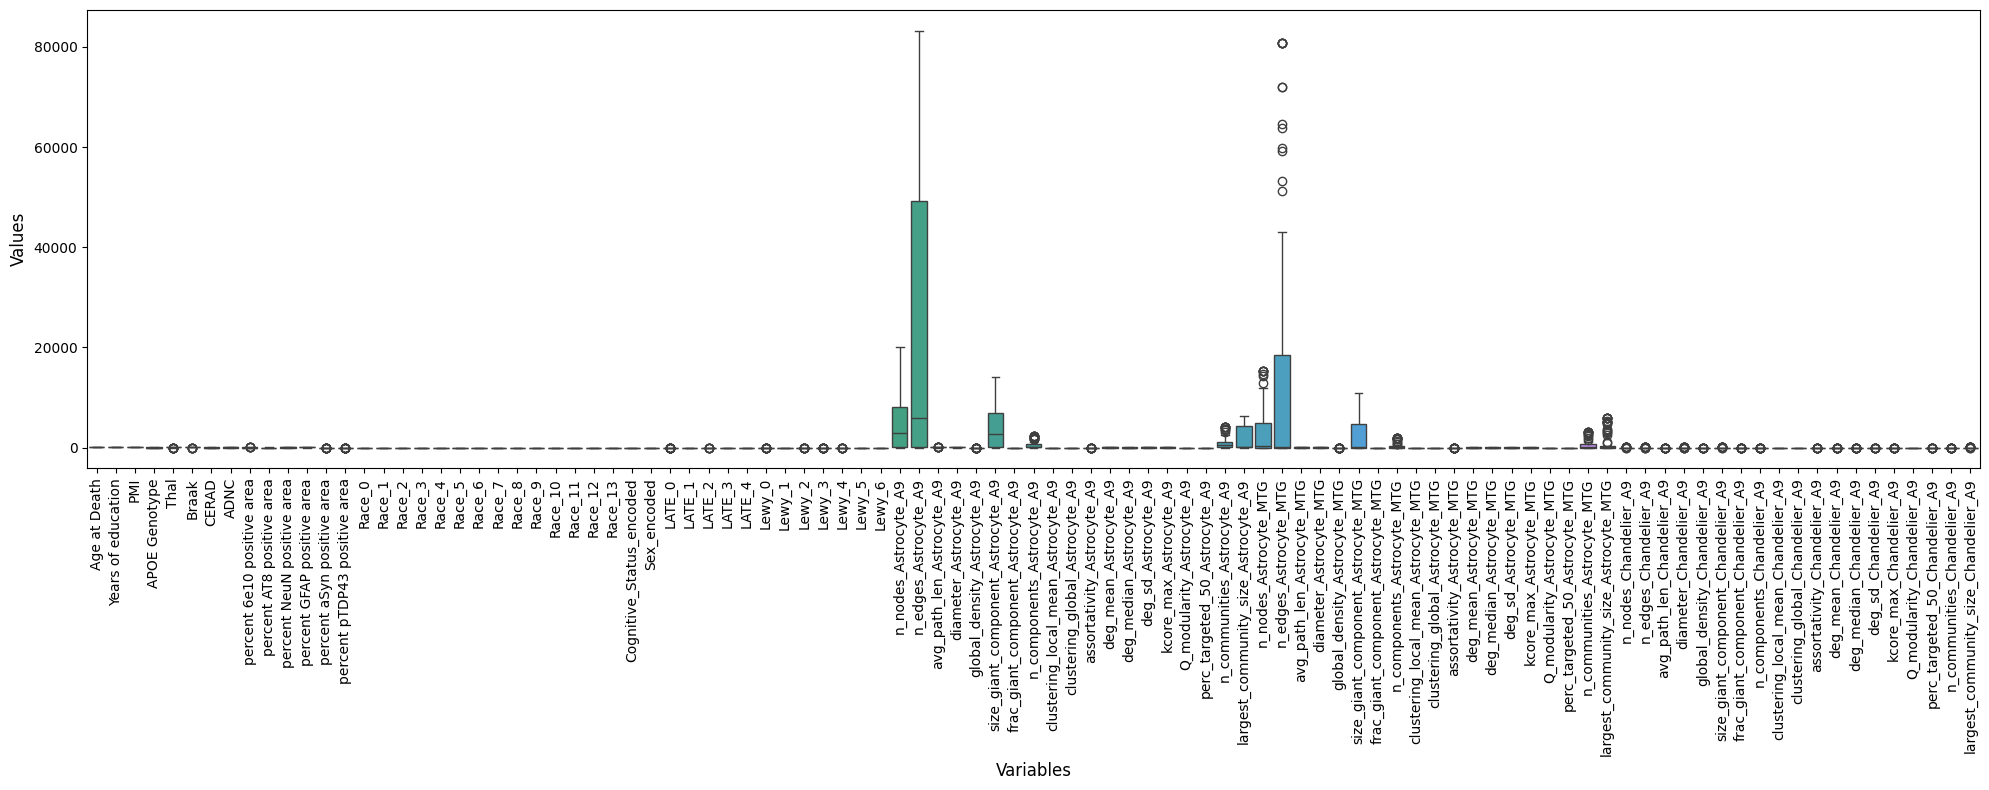

In [32]:
#Complete boxplot
floo_filterpl= floo_filter[floo_filter.columns[:100].tolist()]
plt.figure(figsize=(20, 8))
sns.boxplot(data= floo_filterpl)
#plt.title('Boxplots de 100 Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
print(data.shape)

print(floo_filter.shape)

(84, 7099)
(84, 7099)


##  The variables here stay as they are

# 3.Linear correlation between variables.


In [171]:
def fs_linear_corr(df, zscore_threshold=2.0):
    """
    Variable selection based on Pearson's linear correlation.

    Params
    ------
    df : pd.DataFrame
        Original dataset with numeric and non-numeric variables.
    zscore_threshold : float
        Z-score to define high correlation threshold.

    Returns
    -------
    dict with:
        - df_filtered: DataFrame with final columns (filtered numeric + non-numeric)
        - final_features: list of final selected variables
        - stats: dict with mean, std, thresholds, and deleted variables
- corr_matrix: final squared correlation matrix
- corrs_pre: pre-filtered upper triangle values
- corrs_post: post-filtered upper triangle values
    """

    #Get numric and non numeric vars
    num_df = df.select_dtypes(include=[np.number]).copy()
    non_num_df = df.select_dtypes(exclude=[np.number]).copy()

    #Drop zero variance vars
    variance = num_df.var()
    num_df = num_df.loc[:, variance > 0]

    #Corr matrix
    corr_matrix = num_df.corr(method='pearson').fillna(0)

    #Get correlation distributions
    corrs_pre = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()
    mean_corr = corrs_pre.mean()
    std_corr = corrs_pre.std()

    #Define thresholds based on z-scores
    upper_threshold = mean_corr + zscore_threshold * std_corr
    lower_threshold = mean_corr - zscore_threshold * std_corr

    #Drop reduntant data
    to_drop = set()
    for col in corr_matrix.columns:
        if col in to_drop:
            continue
        high_corr = corr_matrix.index[(corr_matrix[col].abs() > upper_threshold) & (corr_matrix.index != col)]
        to_drop.update(high_corr)

    final_features = [col for col in num_df.columns if col not in to_drop]

    #Final dataframe
    df_filtered = pd.concat([num_df[final_features], non_num_df], axis=1)

    #Final corr matrix (only with selected features)
    corr_matrix_final = df_filtered[final_features].corr().fillna(0)

    #Final corr distribution
    corrs_post = corr_matrix_final.where(np.triu(np.ones(corr_matrix_final.shape), k=1).astype(bool)).stack()

    stats = {
        "mean_corr": mean_corr,
        "std_corr": std_corr,
        "upper_threshold": upper_threshold,
        "lower_threshold": lower_threshold,
        "zscore_threshold": zscore_threshold,
        "num_removed": len(to_drop)#,
       # "removed_features": list(to_drop)
    }

    return {
        "df_filtered": df_filtered,
        "final_features": final_features,
        "stats": stats,
        "corr_matrix": corr_matrix_final,
        "corrs_pre": corrs_pre,
        "corrs_post": corrs_post
    }


In [172]:
linear_filter = fs_linear_corr(data, zscore_threshold=2.0)

In [174]:
print(linear_filter['stats']["mean_corr"])
print(linear_filter['stats']["upper_threshold"])
print(linear_filter['stats']["lower_threshold"])

0.0006141248951024859
0.4871701675962569
-0.48594191780605195


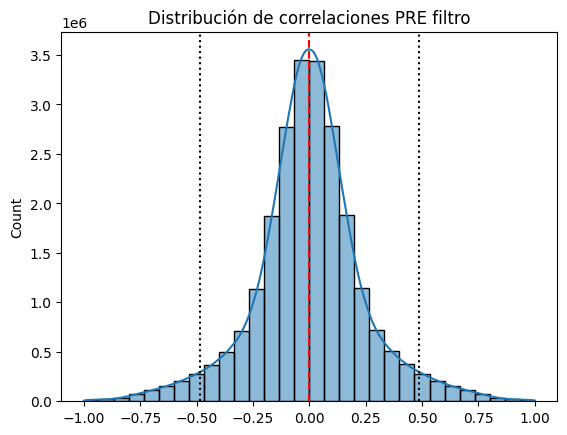

In [182]:
#Plot Linear correlation Pre-filter distribution
sns.histplot(linear_filter["corrs_pre"], bins=30, kde=True)
plt.axvline(linear_filter["stats"]["mean_corr"], color='red', linestyle='--', label=f'Media ({result["stats"]["mean_corr"]:.2f})')
plt.axvline(linear_filter['stats']["upper_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({result["stats"]['upper_threshold']:.2f})')
plt.axvline(linear_filter['stats']["lower_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({result["stats"]['lower_threshold']:.2f})')

plt.title("Distribution of PRE filter correlations")
plt.show()

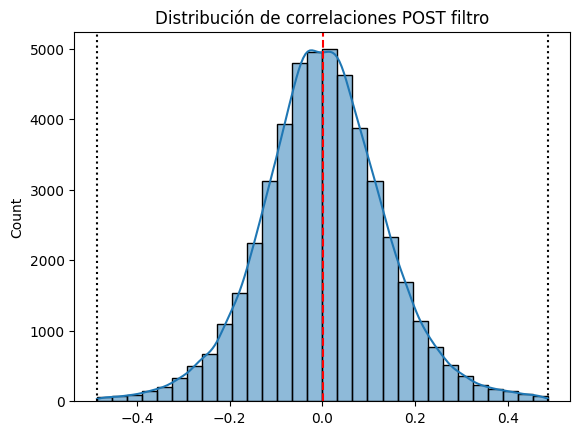

In [183]:
# Distribución post-filtro
sns.histplot(linear_filter["corrs_post"], bins=30, kde=True)
# Añadir líneas verticales para dar contexto
plt.axvline(linear_filter["stats"]["mean_corr"], color='red', linestyle='--', label=f'Media ({result["stats"]["mean_corr"]:.2f})')
plt.axvline(linear_filter['stats']["upper_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({result["stats"]['upper_threshold']:.2f})')
plt.axvline(linear_filter['stats']["lower_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({result["stats"]['lower_threshold']:.2f})')

plt.title("Distribución de correlaciones POST filtro")
plt.show()

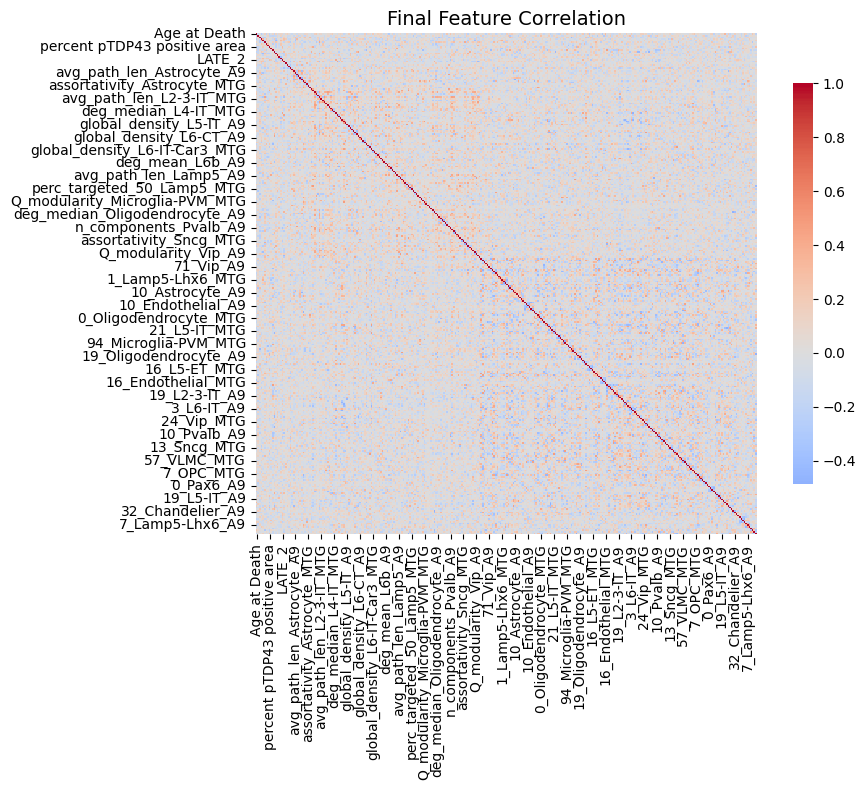

In [184]:
corr_matrix = linear_filter["corr_matrix"]

def plot_corrmatrix(corr_matrix, figsize=(10,8), cmap="coolwarm", title="Correlation Matrix"):
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        cmap=cmap,
        annot=False,
        center=0,
        square=True,
        cbar_kws={"shrink": .8}
    )
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()
plot_corrmatrix(corr_matrix, title="Final Feature Correlation")

## The vars after the linear correlation filter are in :

In [185]:
linear_filter["final_features"]

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Braak',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area',
 'Race_0',
 'Race_5',
 'Race_12',
 'Cognitive_Status_encoded',
 'Sex_encoded',
 'LATE_0',
 'LATE_1',
 'LATE_2',
 'Lewy_0',
 'Lewy_1',
 'Lewy_2',
 'Lewy_4',
 'Lewy_5',
 'Lewy_6',
 'n_nodes_Astrocyte_A9',
 'avg_path_len_Astrocyte_A9',
 'global_density_Astrocyte_A9',
 'assortativity_Astrocyte_A9',
 'deg_median_Astrocyte_A9',
 'Q_modularity_Astrocyte_A9',
 'n_nodes_Astrocyte_MTG',
 'avg_path_len_Astrocyte_MTG',
 'global_density_Astrocyte_MTG',
 'assortativity_Astrocyte_MTG',
 'perc_targeted_50_Astrocyte_MTG',
 'n_nodes_Chandelier_A9',
 'n_nodes_Chandelier_MTG',
 'n_nodes_L2-3-IT_A9',
 'diameter_L2-3-IT_A9',
 'global_density_L2-3-IT_A9',
 'n_nodes_L2-3-IT_MTG',
 'avg_path_len_L2-3-IT_MTG',
 'n_components_L2-3-IT_MTG',
 'kcore_max_L2-3-IT_MTG',
 'n_nodes_L4-IT_A9',
 'avg_path_len_L4-IT_A9',
 '

## 4. Non-Linear correlation between variables (Mutual Information and Variation of Information)

#### Targets are

* Overall AD Neuropathological Change (ADNC)
* Braak
* Thal
* CERAD
* LATE-NC
* Lewy Body Disease Stage
* 6e10
* AT8
* NeuN
* GFAP
* aSyn
* pTDP43

In [186]:
target_vars = ['ADNC',
 'Braak',
 'Thal',
 'CERAD',
 'LATE_0',
 'LATE_1',
 'LATE_2',
 'LATE_3',
 'LATE_4',
 'Lewy_0',
 'Lewy_1',
 'Lewy_2',
 'Lewy_3',
 'Lewy_4',
 'Lewy_5',
 'Lewy_6',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area',
 ]

In [187]:
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer

def calculate_mi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10):
    """
    Calcula una matriz de Información Mutua (MI) usando un método de discretización robusto.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        target_vars (list): Lista de columnas que actuarán como targets.
        n_bins (int): El número de bins para la discretización.

    Returns:
        pd.DataFrame: Una matriz de MI con los targets en las filas.
    """
    # 1. Escoger solo las variables numéricas
    numerics = df.select_dtypes(include=np.number)

    # Validar que los targets existan
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Variables target no encontradas o no numéricas: {missing_targets}")

    # --- NUEVO: Discretización Robusta con KBinsDiscretizer ---
    # strategy='quantile' imita el comportamiento de qcut
    # encode='ordinal' devuelve números enteros para cada bin
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile', subsample=None)

    # Creamos el DataFrame discretizado
    discretized_data = discretizer.fit_transform(numerics)
    df_discretized = pd.DataFrame(discretized_data, index=numerics.index, columns=numerics.columns)

    # 3. Calcular la matriz de Información Mutua
    mi_matrix_data = {}
    for target in target_vars:
        mi_scores = [
            mutual_info_score(df_discretized[target], df_discretized[variable])
            for variable in df_discretized.columns
        ]
        mi_matrix_data[target] = mi_scores

    mi_matrix = pd.DataFrame(mi_matrix_data, index=df_discretized.columns).T

    return mi_matrix

In [50]:
#mi_matrix = calculate_mi_matrix(df = data, target_vars = target_vars, n_bins = 10)

In [51]:
print(mi_matrix)

NameError: name 'mi_matrix' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy

def calculate_mi_vi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10, threshold_quantile: float = 0.9):
    """
    Calcula matrices de Información Mutua (MI) y Variation of Information (VI)
    entre variables target y todas las demás variables numéricas (discretizadas).

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        target_vars (list): Lista de variables target.
        n_bins (int): Número de bins para discretización.
        threshold_quantile (float): Percentil para calcular el threshold de MI.

    Returns:
        mi_matrix (pd.DataFrame): Matriz de Información Mutua.
        vi_matrix (pd.DataFrame): Matriz de Variation of Information.
        threshold (float): Threshold calculado sobre la distribución de MI.
    """
    # 1. Filtrar solo variables numéricas
    numerics = df.select_dtypes(include=np.number)

    # Validar que todos los targets estén presentes
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Variables target no encontradas o no numéricas: {missing_targets}")

    # 2. Discretizar con KBinsDiscretizer (robusto)
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile", subsample=None)
    discretized_data = discretizer.fit_transform(numerics)
    df_disc = pd.DataFrame(discretized_data, index=numerics.index, columns=numerics.columns)

    # 3. Inicializar matrices
    mi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)
    vi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)

    # 4. Calcular MI y VI
    for t in target_vars:
        t_vals = df_disc[t].astype(int)

        for c in df_disc.columns:
            c_vals = df_disc[c].astype(int)

            if t_vals.nunique() <= 1 or c_vals.nunique() <= 1:
                continue

            # MI
            mi = mutual_info_score(t_vals, c_vals)

            # Entropías
            h_t = entropy(np.bincount(t_vals) / len(t_vals))
            h_c = entropy(np.bincount(c_vals) / len(c_vals))

            # VI
            vi = h_t + h_c - 2 * mi

            mi_matrix.loc[t, c] = mi
            vi_matrix.loc[t, c] = vi

    # 5. Calcular threshold global sobre MI
    values = mi_matrix.values.flatten()
    values = values[values > 0]
    threshold = np.quantile(values, threshold_quantile) if len(values) > 0 else None

    return mi_matrix, vi_matrix, threshold


In [ ]:
#mi_df, vi_df, th = calculate_mi_vi_matrix(data, target_vars, n_bins=10, threshold_quantile=0.9)

In [ ]:
#mi_matrix.head(10)

In [ ]:
#vi_df.head(10)

In [ ]:
#th

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy

def calculate_mi_vi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10, threshold_quantile: float = 0.9):
    """
    Calcula matrices de Información Mutua (MI) y Variation of Information (VI)
    entre variables target y todas las demás variables numéricas (discretizadas),
    y filtra según un threshold de MI.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        target_vars (list): Lista de variables target.
        n_bins (int): Número de bins para discretización.
        threshold_quantile (float): Percentil para calcular el threshold de MI.

    Returns:
        mi_matrix (pd.DataFrame): Matriz completa de Información Mutua.
        vi_matrix (pd.DataFrame): Matriz completa de Variation of Information.
        mi_filtered (pd.DataFrame): Matriz MI filtrada por threshold.
        vi_filtered (pd.DataFrame): Matriz VI filtrada por threshold.
        threshold (float): Threshold calculado sobre la distribución de MI.
    """
    # 1. Filtrar solo variables numéricas
    numerics = df.select_dtypes(include=np.number)

    # Validar que todos los targets estén presentes
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Variables target no encontradas o no numéricas: {missing_targets}")

    # 2. Discretizar con KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile", subsample=None)
    discretized_data = discretizer.fit_transform(numerics)
    df_disc = pd.DataFrame(discretized_data, index=numerics.index, columns=numerics.columns)

    # 3. Inicializar matrices
    mi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)
    vi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)

    # 4. Calcular MI y VI
    for t in target_vars:
        t_vals = df_disc[t].astype(int)

        for c in df_disc.columns:
            c_vals = df_disc[c].astype(int)

            if t_vals.nunique() <= 1 or c_vals.nunique() <= 1:
                continue

            # MI
            mi = mutual_info_score(t_vals, c_vals)

            # Entropías
            h_t = entropy(np.bincount(t_vals) / len(t_vals))
            h_c = entropy(np.bincount(c_vals) / len(c_vals))

            # VI
            vi = h_t + h_c - 2 * mi

            mi_matrix.loc[t, c] = mi
            vi_matrix.loc[t, c] = vi

    # 5. Calcular threshold global sobre MI
    values = mi_matrix.values.flatten()
    values = values[values > 0]
    threshold = np.quantile(values, threshold_quantile) if len(values) > 0 else None

    # 6. Filtrar matrices
    mi_filtered = mi_matrix.where(mi_matrix >= threshold, 0)
    vi_filtered = vi_matrix.where(mi_matrix >= threshold, 0)

    return mi_matrix, vi_matrix, mi_filtered, vi_filtered, threshold


In [ ]:
mi, vi, mi_filt, vi_filt, th = calculate_mi_vi_matrix(data, target_vars, n_bins=10, threshold_quantile=0.9)

In [ ]:
print("Threshold:", th)

In [ ]:
print("\nMatriz MI filtrada:\n", mi_filt)

In [ ]:
print("\nMatriz VI filtrada:\n", vi_filt)

In [ ]:
vars_MI  = mi_filt.columns
vars_MI

In [ ]:
vars_VI  = vi_filt.columns
vars_VI

In [188]:
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy

def calculate_mi_vi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10, threshold_quantile: float = 0.9):
    """
    Calcula MI y VI, y filtra para conservar las variables MÁS DIFERENTES (mayor VI)
    respecto a los targets, ideal para selección de características.
    """
    # 1. Filtrar solo variables numéricas
    numerics = df.select_dtypes(include=np.number)

    # Validar que todos los targets estén presentes
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Variables target no encontradas o no numéricas: {missing_targets}")

    # 2. Discretizar con KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile", subsample=None)
    discretized_data = discretizer.fit_transform(numerics)
    df_disc = pd.DataFrame(discretized_data, index=numerics.index, columns=numerics.columns)

    # 3. Inicializar matrices
    mi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)
    vi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)

    # 4. Calcular MI y VI (esta parte no cambia)
    for t in target_vars:
        t_vals = df_disc[t].astype(int)
        for c in df_disc.columns:
            c_vals = df_disc[c].astype(int)
            if t_vals.nunique() <= 1 or c_vals.nunique() <= 1:
                continue

            mi = mutual_info_score(t_vals, c_vals)
            h_t = entropy(np.bincount(t_vals) / len(t_vals))
            h_c = entropy(np.bincount(c_vals) / len(c_vals))
            vi = h_t + h_c - 2 * mi

            mi_matrix.loc[t, c] = mi
            vi_matrix.loc[t, c] = vi

    # --- CAMBIO CLAVE ---
    # 5. Calcular threshold global sobre VI (distancia), no MI (similitud)
    values = vi_matrix.values.flatten()
    values = values[values > 0]
    threshold = np.quantile(values, threshold_quantile) if len(values) > 0 else None

    # 6. Filtrar matrices para mantener solo las que superan el umbral de VI
    mi_filtered = mi_matrix.where(vi_matrix >= threshold, 0)
    vi_filtered = vi_matrix.where(vi_matrix >= threshold, 0)

    return mi_matrix, vi_matrix, mi_filtered, vi_filtered, threshold

In [189]:
mi, vi, mi_filt, vi_filt, th = calculate_mi_vi_matrix(data, target_vars, n_bins=10, threshold_quantile=0.9)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306

# 6. PCA


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_and_get_loadings(df: pd.DataFrame, n_components: int = 2, n_top_variables: int = 5):
    """
    Realiza PCA sobre las columnas numéricas de un DataFrame y devuelve las variables
    más influyentes (loadings) para cada Componente Principal.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        n_components (int): Número de Componentes Principales a analizar.
        n_top_variables (int): Número de variables más influyentes a devolver por componente.

    Returns:
        tuple: Una tupla conteniendo:
            - pca_object (PCA): El objeto PCA ajustado de scikit-learn.
            - loadings_df (pd.DataFrame): DataFrame con los loadings de cada variable por componente.
            - top_variables (dict): Diccionario con las N variables más influyentes para cada PC.
    """
    # 1. Seleccionar solo columnas numéricas
    numerics = df.select_dtypes(include=np.number)

    if numerics.shape[1] < n_components:
        raise ValueError("El número de componentes no puede ser mayor que el número de variables numéricas.")

    # 2. Estandarizar los datos (paso crucial)
    scaled_data = StandardScaler().fit_transform(numerics)

    # 3. Aplicar PCA
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)

    # 4. Analizar los "Loadings"
    # Los loadings están en el atributo 'components_' del objeto PCA
    loadings_df = pd.DataFrame(
        pca.components_.T, # .T para transponer y tener variables en filas
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=numerics.columns
    )

    # 5. Identificar las variables más influyentes
    top_variables = {}
    for pc in loadings_df.columns:
        # Tomamos el valor absoluto de los loadings, los ordenamos y seleccionamos los N más altos
        top_vars = loadings_df[pc].abs().sort_values(ascending=False).head(n_top_variables).index.tolist()
        top_variables[pc] = top_vars

    return pca, loadings_df, top_variables

In [ ]:
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy

def calculate_mi_vi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10, threshold_quantile: float = 0.9):
    """
    Calcula MI y VI, y filtra para conservar las variables MÁS DIFERENTES (mayor VI)
    respecto a los targets, ideal para selección de características.
    """
    # 1. Filtrar solo variables numéricas
    numerics = df.select_dtypes(include=np.number)

    # Validar que todos los targets estén presentes
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Variables target no encontradas o no numéricas: {missing_targets}")

    # 2. Discretizar con KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile", subsample=None)
    discretized_data = discretizer.fit_transform(numerics)
    df_disc = pd.DataFrame(discretized_data, index=numerics.index, columns=numerics.columns)

    # 3. Inicializar matrices
    mi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)
    vi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)

    # 4. Calcular MI y VI (esta parte no cambia)
    for t in target_vars:
        t_vals = df_disc[t].astype(int)
        for c in df_disc.columns:
            c_vals = df_disc[c].astype(int)
            if t_vals.nunique() <= 1 or c_vals.nunique() <= 1:
                continue

            mi = mutual_info_score(t_vals, c_vals)
            h_t = entropy(np.bincount(t_vals) / len(t_vals))
            h_c = entropy(np.bincount(c_vals) / len(c_vals))
            vi = h_t + h_c - 2 * mi

            mi_matrix.loc[t, c] = mi
            vi_matrix.loc[t, c] = vi

    # --- CAMBIO CLAVE ---
    # 5. Calcular threshold global sobre VI (distancia), no MI (similitud)
    values = vi_matrix.values.flatten()
    values = values[values > 0]
    threshold = np.quantile(values, threshold_quantile) if len(values) > 0 else None

    # 6. Filtrar matrices para mantener solo las que superan el umbral de VI
    mi_filtered = mi_matrix.where(vi_matrix >= threshold, 0)
    vi_filtered = vi_matrix.where(vi_matrix >= threshold, 0)

    return mi_matrix, vi_matrix, mi_filtered, vi_filtered, threshold

# 7. Voting matrix

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def voting_matrix(filters_dict: dict, min_votes: int = 2):
    """
    Genera una matriz de votación de variables filtradas por distintas funciones,
    y devuelve la lista de variables ganadoras.

    Args:
        filters_dict (dict): Diccionario {nombre_filtro: lista_de_variables}.
        min_votes (int): Número mínimo de votos para considerar a una variable como ganadora.

    Returns:
        vote_df (pd.DataFrame): Matriz binaria de votación (variables x filtros + votos).
        winners (list): Lista de variables con al menos `min_votes` votos.
    """
    # Crear lista de listas
    filter_names = list(filters_dict.keys())
    filter_vars = list(filters_dict.values())

    # Usar MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    binary_matrix = mlb.fit_transform(filter_vars)

    # Crear DataFrame binario
    vote_df = pd.DataFrame(binary_matrix.T, index=mlb.classes_, columns=filter_names)

    # Agregar columna con total de votos
    vote_df["votes"] = vote_df.sum(axis=1)

    # Variables ganadoras
    winners = vote_df[vote_df["votes"] >= min_votes].index.tolist()

    return vote_df.sort_values("votes", ascending=False), winners


In [ ]:
filters = {
    "filter_MI": ["Braak", "Thal", "CERAD", "percent AT8 positive area"],
    "filter_VI": ["Braak", "ADNC", "percent NeuN positive area"],
    "filter_Corr": ["CERAD", "ADNC", "percent GFAP positive area"]
}

vote_matrix, winners = voting_matrix(filters, min_votes=2)

print("Matriz de votación:\n", vote_matrix)
print("\nVariables ganadoras:", winners)
